# 3. Transformacion de datos

In [1]:
import pandas as pd
import numpy as np
"""graficas"""
import matplotlib.pyplot as plt
import seaborn as sns
"""codificar"""
from sklearn.preprocessing import StandardScaler
"""mezclar y dividir datos"""
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split, StratifiedShuffleSplit
"""caracteristicas"""
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier

# Funciones

In [2]:
"""graficas de escalamiento de datos"""
def grafica_estandarizacion(x_original,x_scal):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(24, 7))

    for (label, content) in x_original.iteritems():
        ax1.set_title('Antes')
        sns.kdeplot(x_original[label], ax=ax1, label=label)
        leg = ax1.legend(loc=0, bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    
    for (label, content) in x_scal.iteritems():
        ax2.set_title('Despues')
        sns.kdeplot(x_scal[label], ax=ax2, label=label)
        leg = ax2.legend(loc=0, bbox_to_anchor=[0, 1],
                     ncol=2, shadow=True, title="Legend", fancybox=True)
    #plt.savefig('estandarizacion_tts.png')

## Importacion de datos

In [3]:
df_traffic = pd.read_csv('../../araData/Z/Categorizado.csv', low_memory=False)

## 3.1 Analizar muestras

In [2]:
"""importar datos"""
df_total = pd.read_csv('../../araDataFin/L4/trafico_total_num.csv',low_memory=False)

In [5]:
df_traffic.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 210931 entries, 0 to 210930
Data columns (total 40 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   protoTcp     210931 non-null  int64  
 1   protoUdp     210931 non-null  int64  
 2   portSystem   210931 non-null  int64  
 3   portUser     210931 non-null  int64  
 4   portDynamic  210931 non-null  int64  
 5   Dur          210931 non-null  float64
 6   SrcDur       210931 non-null  float64
 7   DstDur       210931 non-null  float64
 8   TotPkts      210931 non-null  int64  
 9   SrcPkts      210931 non-null  int64  
 10  DstPkts      210931 non-null  int64  
 11  TotBytes     210931 non-null  int64  
 12  SrcBytes     210931 non-null  int64  
 13  DstBytes     210931 non-null  int64  
 14  TotAppByte   210931 non-null  int64  
 15  SAppBytes    210931 non-null  int64  
 16  DAppBytes    210931 non-null  int64  
 17  Load         210931 non-null  float64
 18  SrcLoad      210931 non-

In [6]:
df_traffic.describe()

,protoTcp,protoUdp,portSystem,portUser,portDynamic,Dur,SrcDur,DstDur,TotPkts,SrcPkts,...,SynAck,AckDat,Offset,sMeanPktSz,dMeanPktSz,sMaxPktSz,dMaxPktSz,sMinPktSz,dMinPktSz,Label
count,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,...,210931.000000,210931.000000,2.109310e+05,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000,210931.000000
mean,0.632093,0.367907,0.805899,0.182363,0.011738,1.967261,1.956430,1.727489,30.592104,14.678748,...,0.003435,0.003277,1.880798e+07,122.773833,243.626994,378.333796,840.571746,73.893961,112.153121,1.640527
std,0.482237,0.482237,0.395508,0.386144,0.107707,4.843998,4.832996,4.711349,588.571574,279.368632,...,0.044555,0.013594,5.846708e+07,174.111499,531.317704,1185.307121,4206.879743,36.721536,138.436182,1.005577
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,1.280000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,1.000000,0.000000,0.000000,0.002098,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,7.648200e+05,58.000000,54.000000,58.000000,54.000000,54.000000,54.000000,1.000000
50%,1.000000,0.000000,1.000000,0.000000,0.000000,0.004032,0.000000,0.000000,2.000000,1.000000,...,0.000000,0.000000,2.071480e+06,75.000000,116.285713,81.000000,169.000000,66.000000,60.000000,2.000000
75%,1.000000,1.000000,1.000000,0.000000,0.000000,0.109034,0.094168,0.029203,12.000000,6.000000,...,0.000005,0.000034,4.249768e+06,121.833336,378.000000,174.000000,419.000000,76.000000,66.000000,2.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,19.999998,19.999998,19.999998,100777.000000,57973.000000,...,7.028434,1.232833,3.400607e+08,4577.167480,47301.550781,65226.000000,65226.000000,1048.000000,1739.000000,3.000000


## Seleccion de variables X y Y

In [9]:
"""matriz de caracteristicas"""
caracteristicas = ['Dur','SrcDur','DstDur','protoTcp','protoUdp','portSystem','portUser','portDynamic','TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 
                   'TotAppByte', 'SAppBytes', 'DAppBytes', 'Load', 'SrcLoad', 'DstLoad', 'Rate', 'SrcRate', 'DstRate', 
                   'TcpRtt', 'SynAck', 'AckDat', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'sMaxPktSz','dMaxPktSz', 
                   'sMinPktSz', 'dMinPktSz']
len(caracteristicas)

33

In [10]:
X= df_traffic[caracteristicas].values
y=df_traffic.iloc[:,-1].values

In [11]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index,"\n")
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [ 54185  35667   3892 ... 146566 208655 187604] TEST: [122857  71002 127001 ...  73949  89941  85570] 

TRAIN: [ 71717 193674 118875 ... 121049 120409 208551] TEST: [ 87343  82456  95056 ...  57206 202706  62026] 

TRAIN: [207233  46841 100196 ...  26044  37132 139765] TEST: [ 70855 158466  19504 ... 145725 194924 157674] 

TRAIN: [170367  93677  59965 ... 188970   6076  43242] TEST: [ 31836 206953 205703 ... 108909 131781  86532] 

TRAIN: [174640 183161  70016 ...  42598   8350  86135] TEST: [107473  55786 130976 ...  63093 138426 171047] 



In [13]:
"""estandarizar datos"""
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [14]:
np.mean(X_train),np.std(X_train)

(-3.949029113173158e-15, 1.0000000000000608)

In [15]:
"""almacenar los valores de la matriz de caracteristicas antes y despues de escalar"""
x_original_sss = pd.DataFrame(data=X_train, columns=caracteristicas)#----x_original['Label'] aplica
x_scal_sss = pd.DataFrame(data=X_train,columns=caracteristicas)

C:\Users\miancastillo\AppData\Local\Temp\ipykernel_2712\579005148.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in x_original.iteritems():
C:\Users\miancastillo\AppData\Local\Temp\ipykernel_2712\579005148.py:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in x_scal.iteritems():


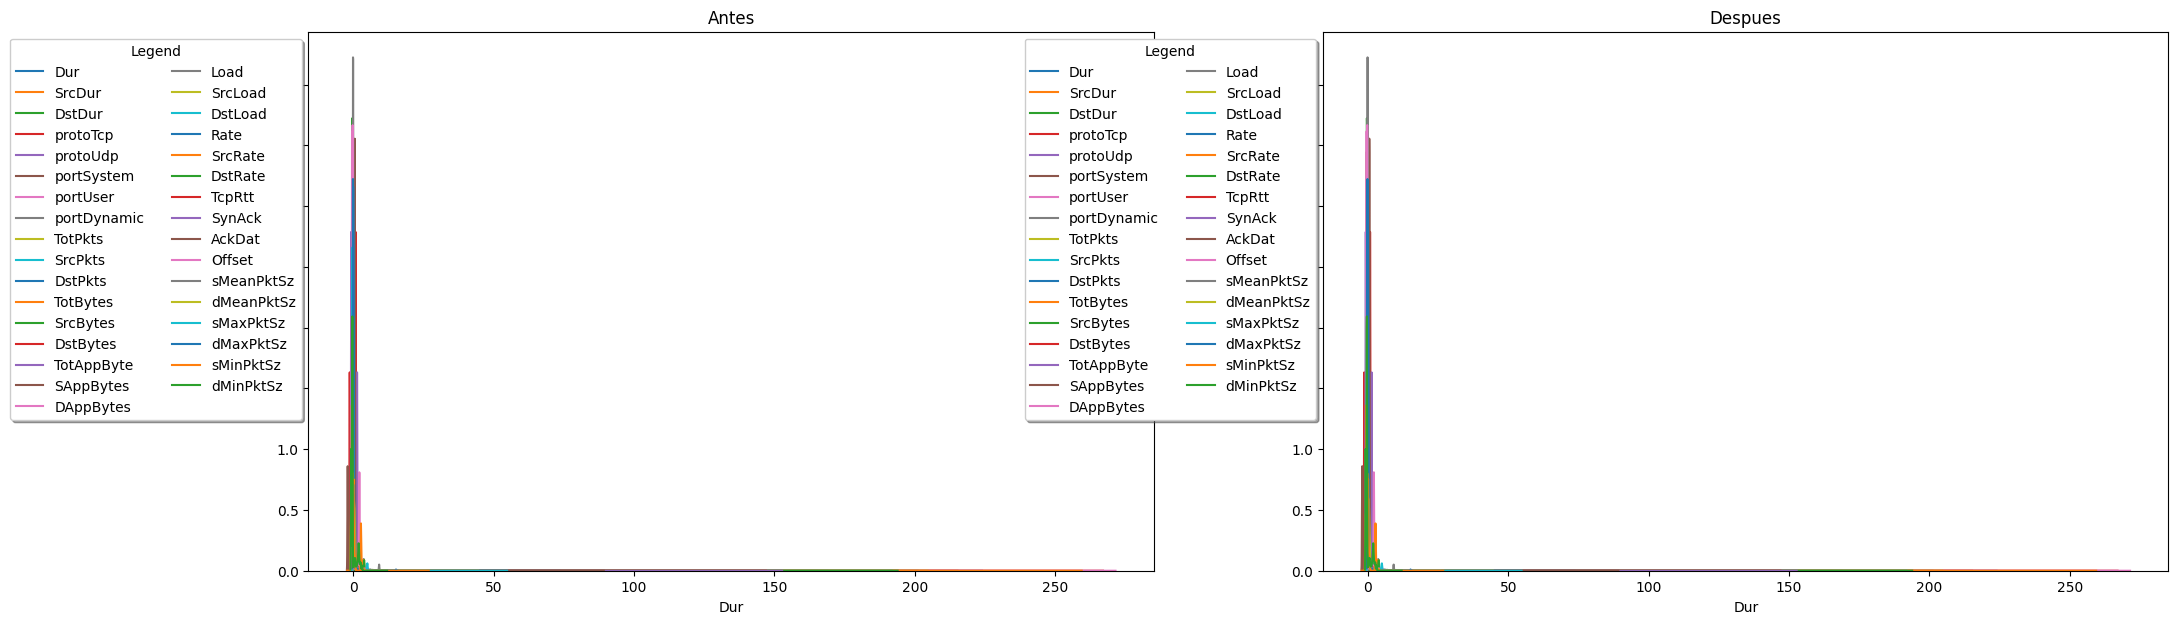

In [16]:
grafica_estandarizacion(x_original_sss,x_scal_sss)

## K-Best 

In [18]:
x_chi=df_traffic.drop('Label',axis=1)
y_chi=pd.DataFrame(df_traffic.Label)

In [19]:
select = SelectKBest(score_func=chi2, k=30)
z = select.fit_transform(x_chi,y_chi)

In [20]:
list(np.take(x_chi.columns, np.where(select.get_support() == True)[0]))

['portUser',
 'Dur',
 'SrcDur',
 'DstDur',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'TotAppByte',
 'SAppBytes',
 'DAppBytes',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'pLoss',
 'pSrcLoss',
 'Rate',
 'SrcRate',
 'DstRate',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'sMaxPktSz',
 'dMaxPktSz',
 'sMinPktSz',
 'dMinPktSz']

## Arboles extremandamente aleatorios 

[0.03284948 0.04845363 0.06022889 0.03763282 0.05470042 0.10480705
 0.08361562 0.00627474 0.03404214 0.02401076 0.04100985 0.01146817
 0.01385393 0.01885863 0.0113114  0.01144155 0.02558405 0.00383349
 0.00229302 0.00211191 0.00466913 0.00237808 0.00288664 0.00300945
 0.00287156 0.01749259 0.05925764 0.02138771 0.04830014 0.02572843
 0.04003476 0.06880671 0.07479562]


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


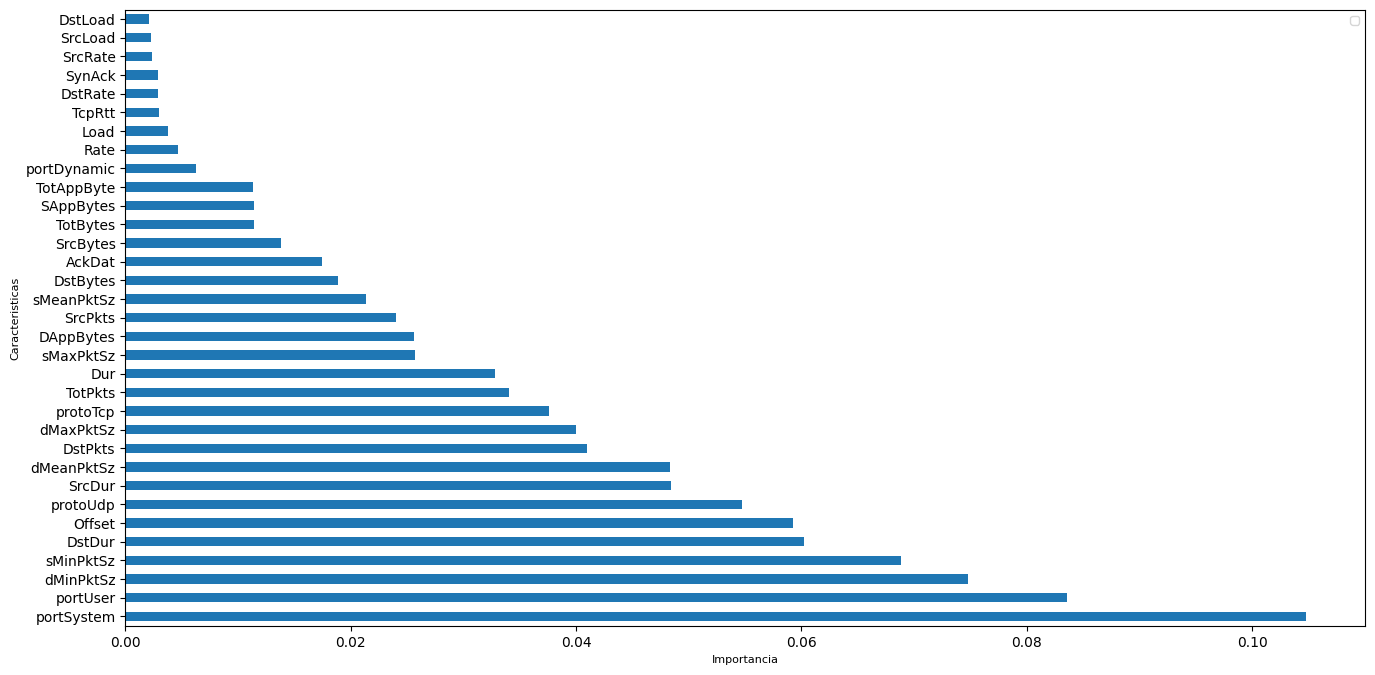

In [22]:
m_extract_features = ExtraTreesClassifier()
m_extract_features.fit(x_scal_sss, y_train)
plt.figure(figsize=(16,8))
print(m_extract_features.feature_importances_)
feat_importances = pd.Series(m_extract_features.feature_importances_, index=x_scal_sss.columns)
feat_importances.nlargest(45).plot(kind='barh')
plt.xlabel('Importancia', fontsize = 8)
plt.ylabel('Caracteristicas', fontsize = 8)
plt.legend(fontsize="small")
#plt.savefig('FeatureTreesClassifier.png')
plt.show()

## Matriz de Correlacion

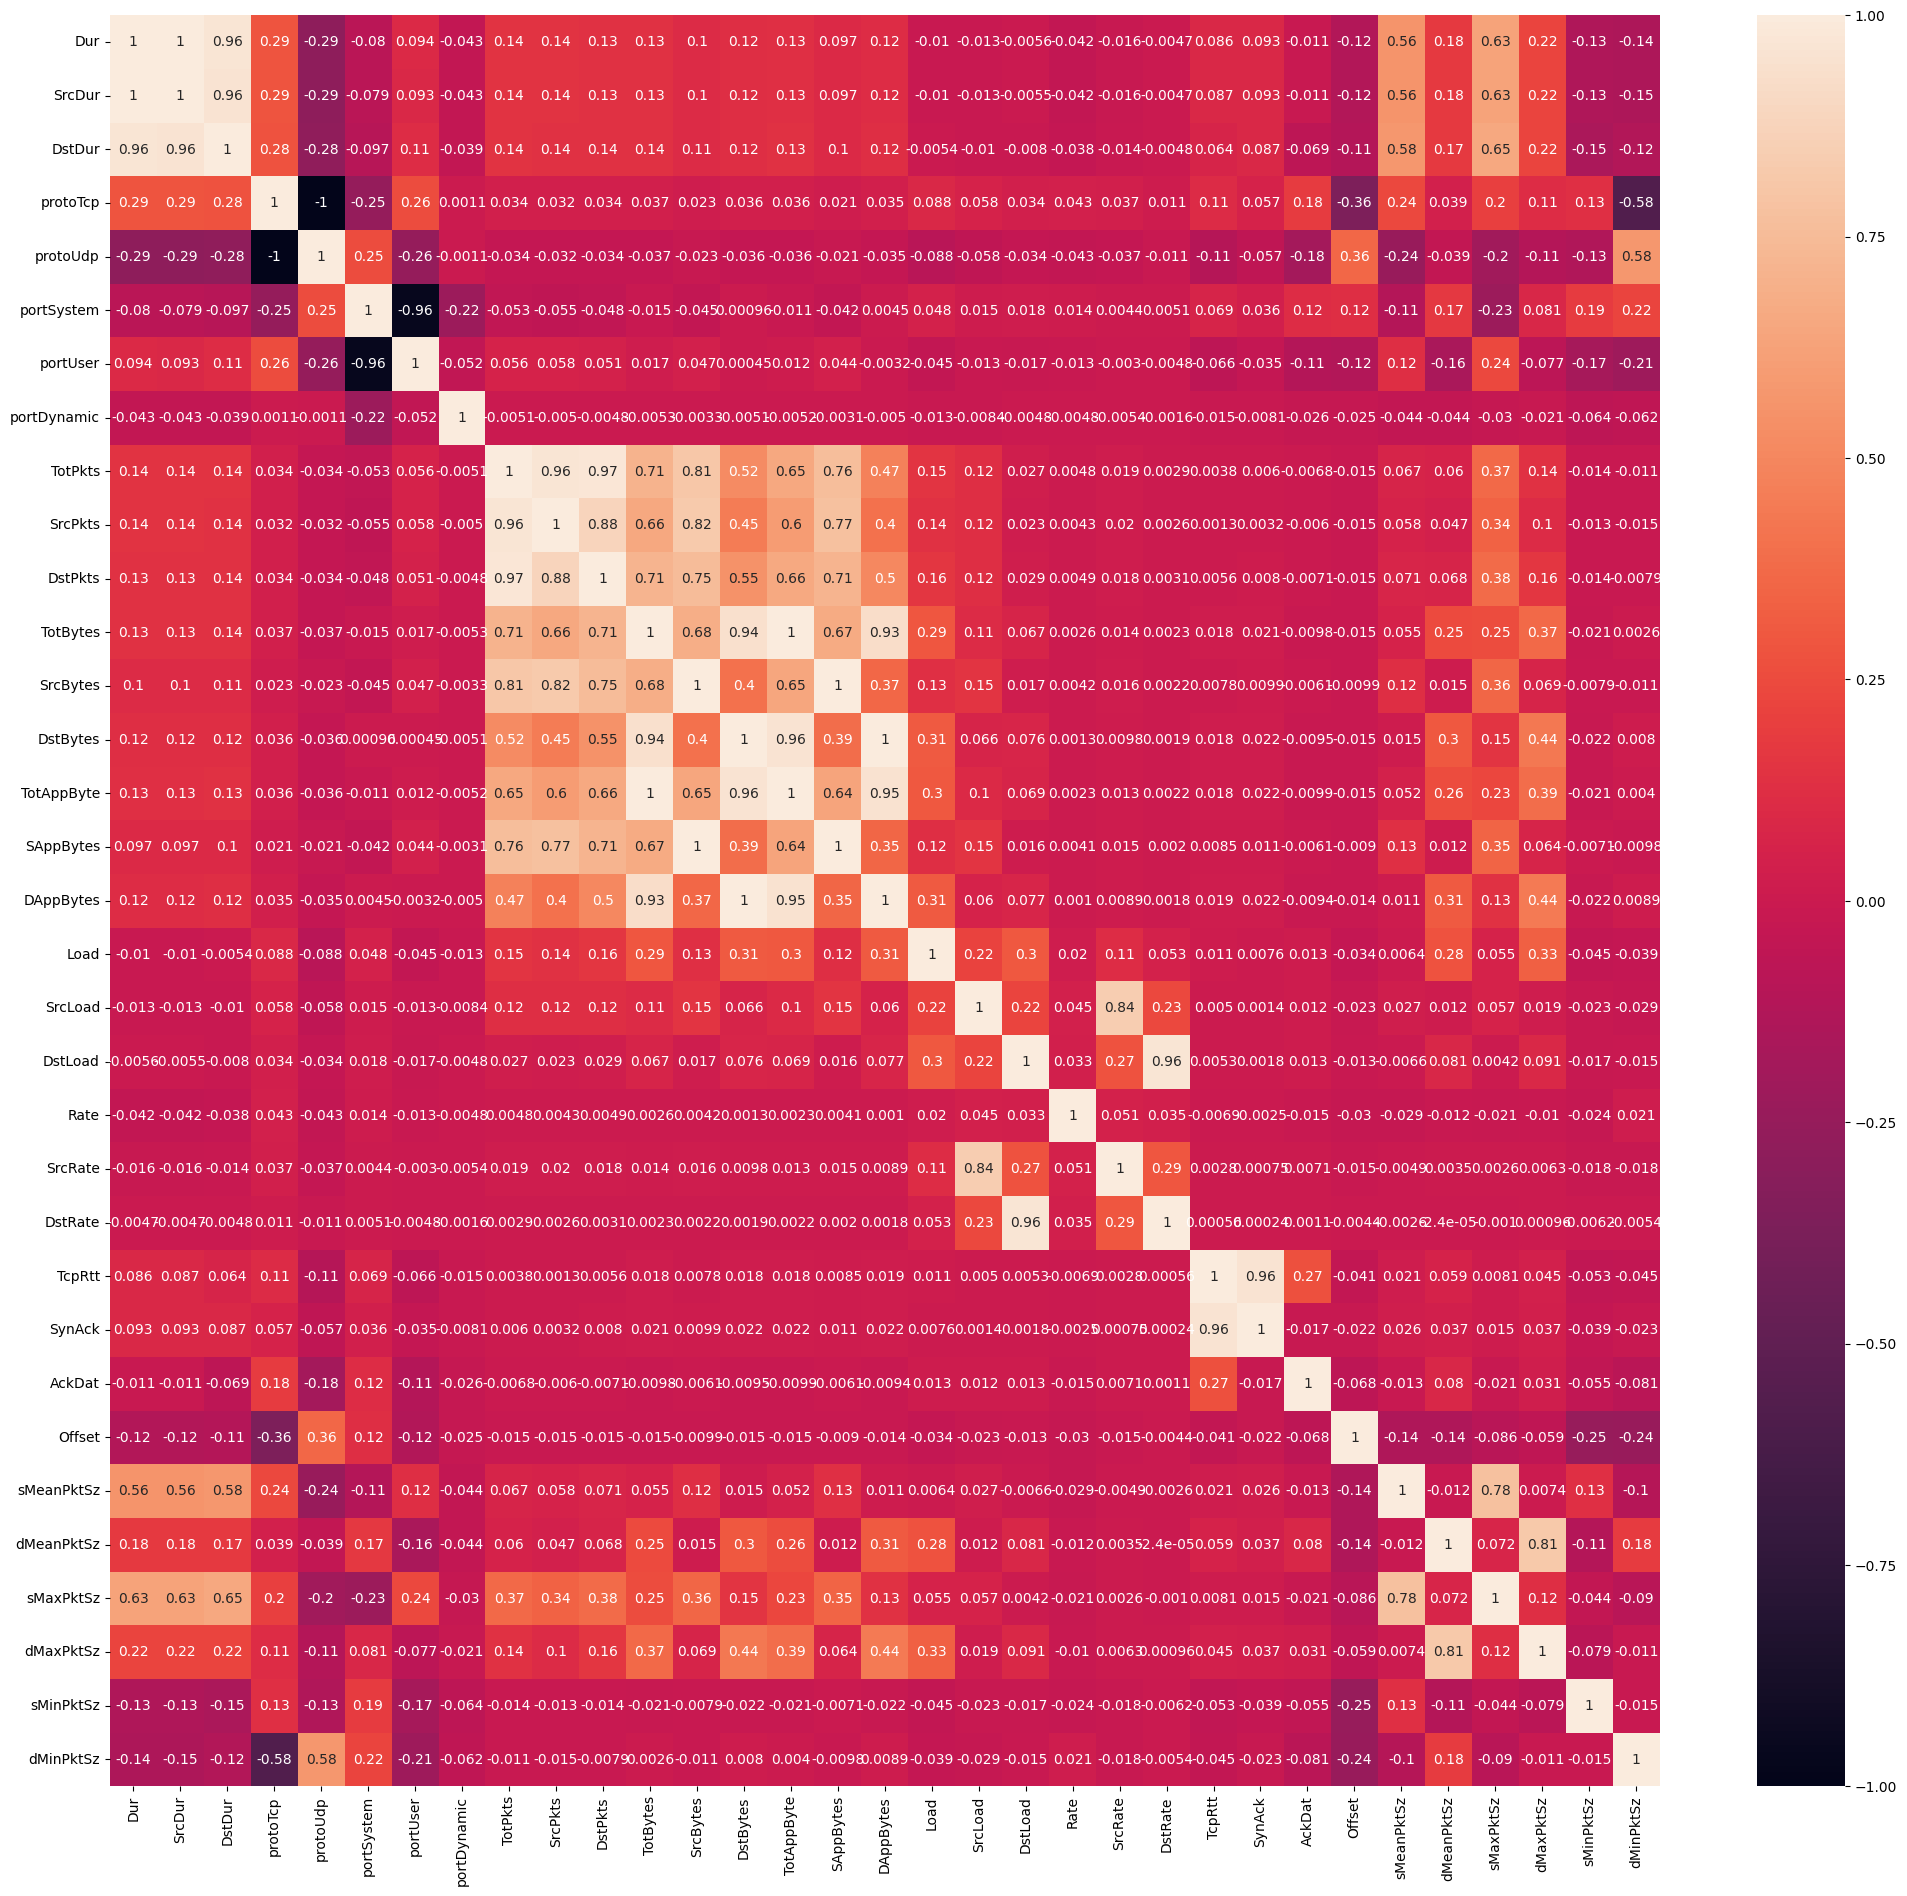

In [21]:
plt.figure(figsize=(25, 23))
sns.heatmap(x_scal_sss.corr(method='pearson'), annot=True)
plt.show()

## Analisis de Componentes Principales

In [25]:
pca = PCA(n_components=30)
componentes_principales = pca.fit(x_scal_sss)

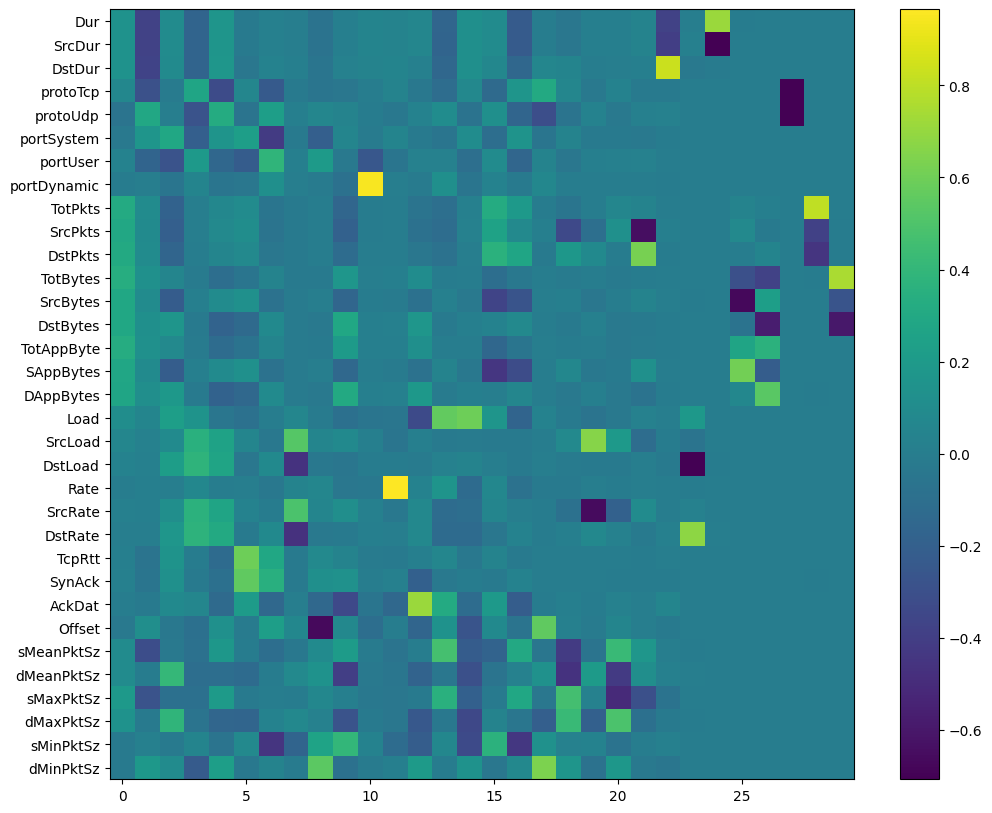

In [31]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
plt.imshow(componentes_principales.components_.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(x_scal_sss.columns)), x_scal_sss.columns)
plt.grid(False)
plt.savefig('features_pca.png')
plt.colorbar()

# **4 Clases Balanceadas**

In [3]:
df_traffic = pd.read_csv('../../araData/Z/balance_total4clases_34200.csv', low_memory=False)

## Seleccion de variables X y Y

In [4]:
"""matriz de caracteristicas"""
caracteristicas = ['Dur','SrcDur','DstDur','protoTcp','protoUdp','portSystem','portUser','portDynamic','TotPkts', 'SrcPkts', 'DstPkts', 'TotBytes', 'SrcBytes', 'DstBytes', 
                   'TotAppByte', 'SAppBytes', 'DAppBytes', 'Load', 'SrcLoad', 'DstLoad', 'Rate', 'SrcRate', 'DstRate', 
                   'TcpRtt', 'SynAck', 'AckDat', 'Offset', 'sMeanPktSz', 'dMeanPktSz', 'sMaxPktSz','dMaxPktSz', 
                   'sMinPktSz', 'dMinPktSz']
len(caracteristicas)

33

In [5]:
X= df_traffic[caracteristicas].values
y=df_traffic.iloc[:,-1].values

In [6]:
sss = StratifiedShuffleSplit(n_splits=5, test_size=0.2, random_state=1)
for train_index, test_index in sss.split(X, y):
  print("TRAIN:", train_index, "TEST:", test_index,"\n")
  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

TRAIN: [  7796 125997 128659 ...  86037 124109  49000] TEST: [ 55076   4502  32946 ... 100259  97820  76556] 

TRAIN: [113815  83804  50153 ...  41483  16120  43324] TEST: [  5501  81943 108306 ...  68954  53393 109653] 

TRAIN: [ 14448  86609 119950 ... 107651 133072   9240] TEST: [77429 65710 19312 ... 61056 64365 90679] 

TRAIN: [124218  76780  46969 ... 123532  67381  49343] TEST: [ 7411 56756 44347 ... 17245  3822   788] 

TRAIN: [130574  12785  24997 ...  29575  74460  72186] TEST: [110946  84715 127594 ...  72033  90596  51781] 



In [8]:
"""estandarizar datos"""
scalar = StandardScaler()
X_train = scalar.fit_transform(X_train)
X_test = scalar.transform(X_test)

In [9]:
np.mean(X_train),np.std(X_train)

(-2.6286335228725538e-15, 1.0000000000000862)

In [10]:
"""almacenar los valores de la matriz de caracteristicas antes y despues de escalar"""
#x_original_sss = pd.DataFrame(data=X_train, columns=caracteristicas)#----x_original['Label'] aplica
x_scal_sss = pd.DataFrame(data=X_train,columns=caracteristicas)

C:\Users\miancastillo\AppData\Local\Temp\ipykernel_14604\579005148.py:5: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in x_original.iteritems():
C:\Users\miancastillo\AppData\Local\Temp\ipykernel_14604\579005148.py:11: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for (label, content) in x_scal.iteritems():


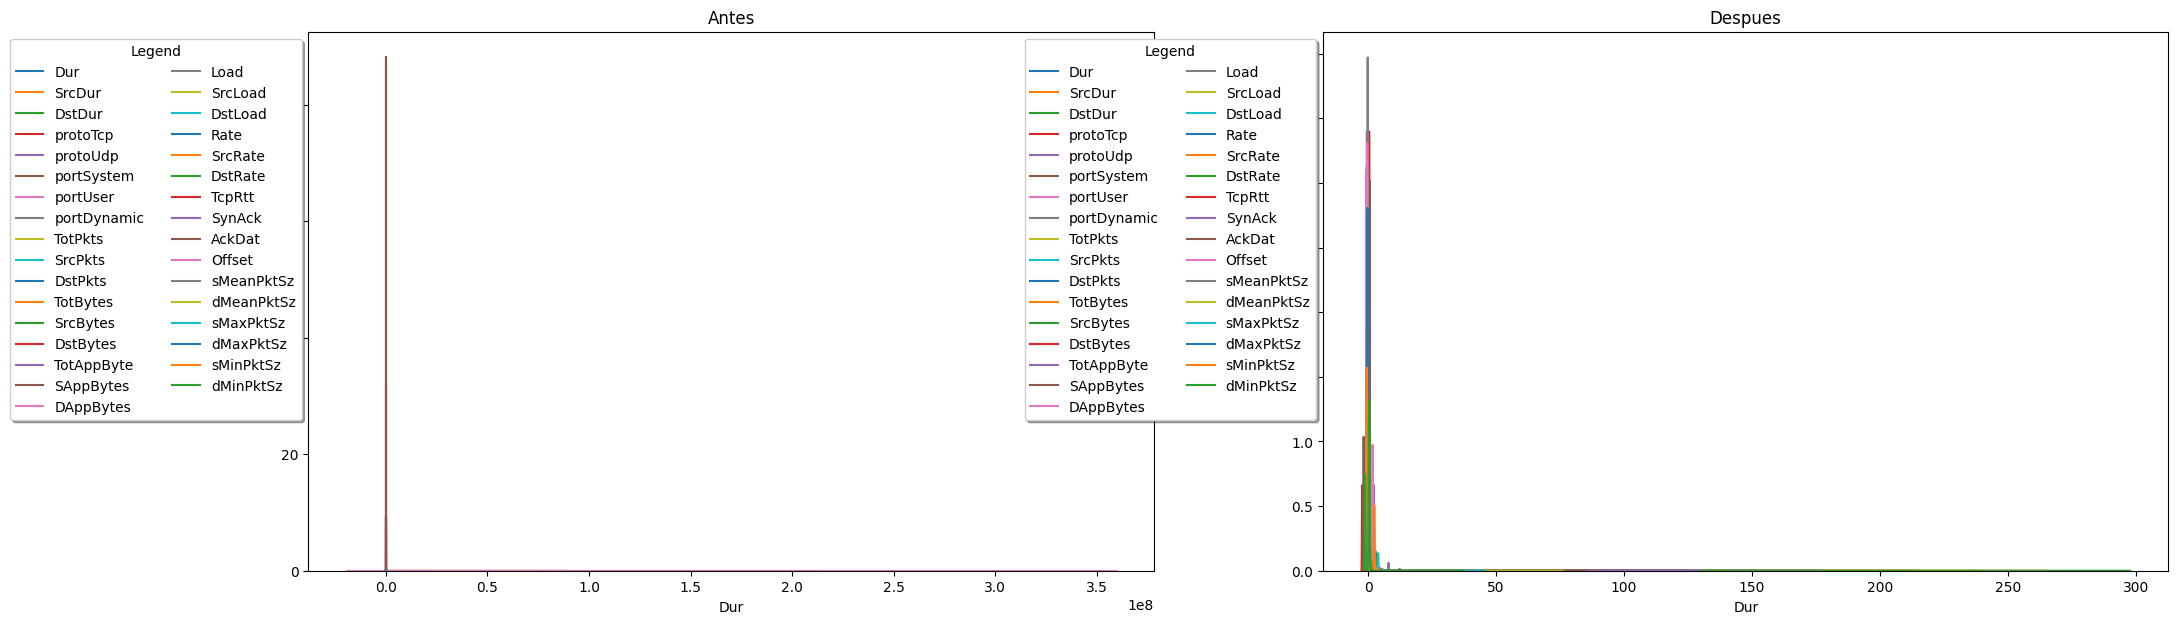

In [11]:
grafica_estandarizacion(x_original_sss,x_scal_sss)

# K-Best

In [12]:
x_chi=df_traffic.drop('Label',axis=1)
y_chi=pd.DataFrame(df_traffic.Label)
select = SelectKBest(score_func=chi2, k=30)
z = select.fit_transform(x_chi,y_chi)

In [13]:
list(np.take(x_chi.columns, np.where(select.get_support() == True)[0]))

['portUser',
 'Dur',
 'SrcDur',
 'DstDur',
 'TotPkts',
 'SrcPkts',
 'DstPkts',
 'TotBytes',
 'SrcBytes',
 'DstBytes',
 'TotAppByte',
 'SAppBytes',
 'DAppBytes',
 'Load',
 'SrcLoad',
 'DstLoad',
 'Loss',
 'SrcLoss',
 'pLoss',
 'pSrcLoss',
 'Rate',
 'SrcRate',
 'DstRate',
 'Offset',
 'sMeanPktSz',
 'dMeanPktSz',
 'sMaxPktSz',
 'dMaxPktSz',
 'sMinPktSz',
 'dMinPktSz']

## Arboles extremandamente aleatorios 

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


[0.08007019 0.07880475 0.10299826 0.03858995 0.03477629 0.12209717
 0.08371166 0.00586335 0.01578062 0.02433861 0.01924948 0.00776131
 0.01277674 0.0130175  0.00648137 0.00781956 0.00885385 0.00697651
 0.00298392 0.00317263 0.00289628 0.00534473 0.00261616 0.0026164
 0.00229092 0.01499648 0.03719534 0.02597171 0.02005992 0.02619413
 0.0167512  0.10094894 0.06599409]


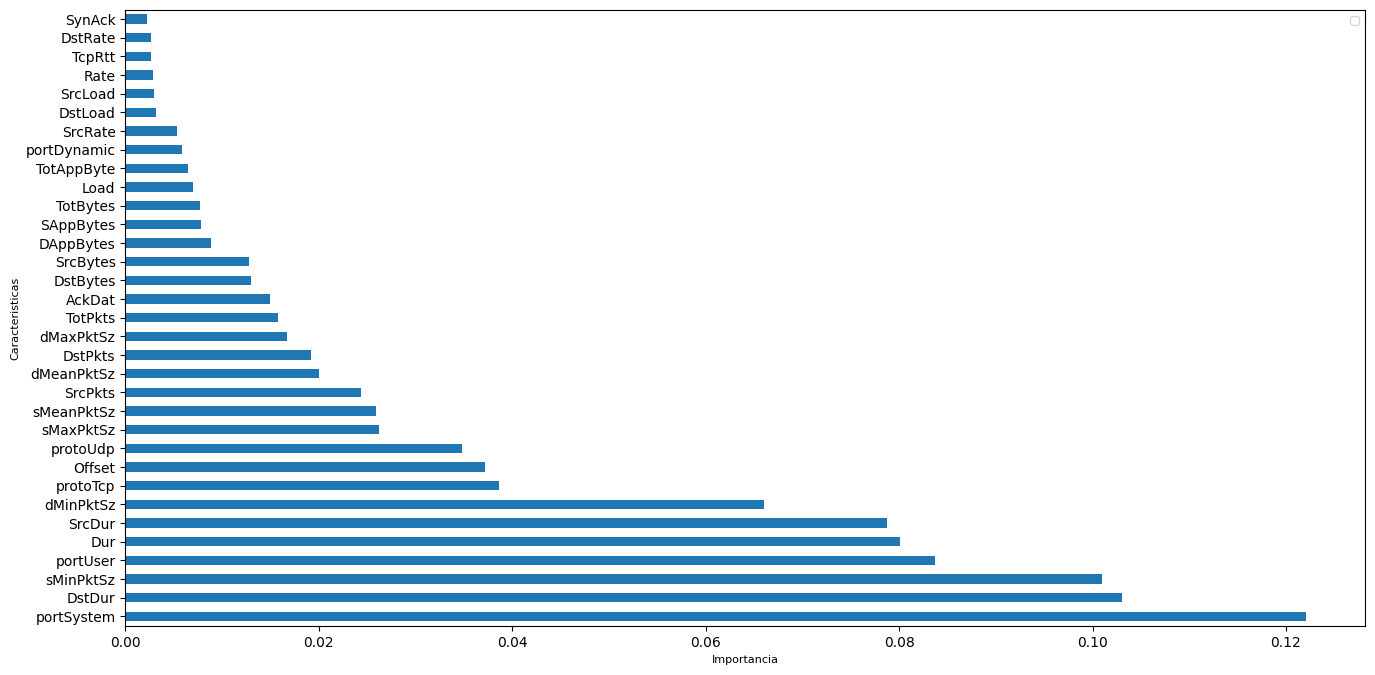

In [14]:
m_extract_features = ExtraTreesClassifier()
m_extract_features.fit(x_scal_sss, y_train)
plt.figure(figsize=(16,8))
print(m_extract_features.feature_importances_)
feat_importances = pd.Series(m_extract_features.feature_importances_, index=x_scal_sss.columns)
feat_importances.nlargest(45).plot(kind='barh')
plt.xlabel('Importancia', fontsize = 8)
plt.ylabel('Caracteristicas', fontsize = 8)
plt.legend(fontsize="small")
#plt.savefig('FeatureTreesClassifier.png')
plt.show()

## Matriz de Correlacion

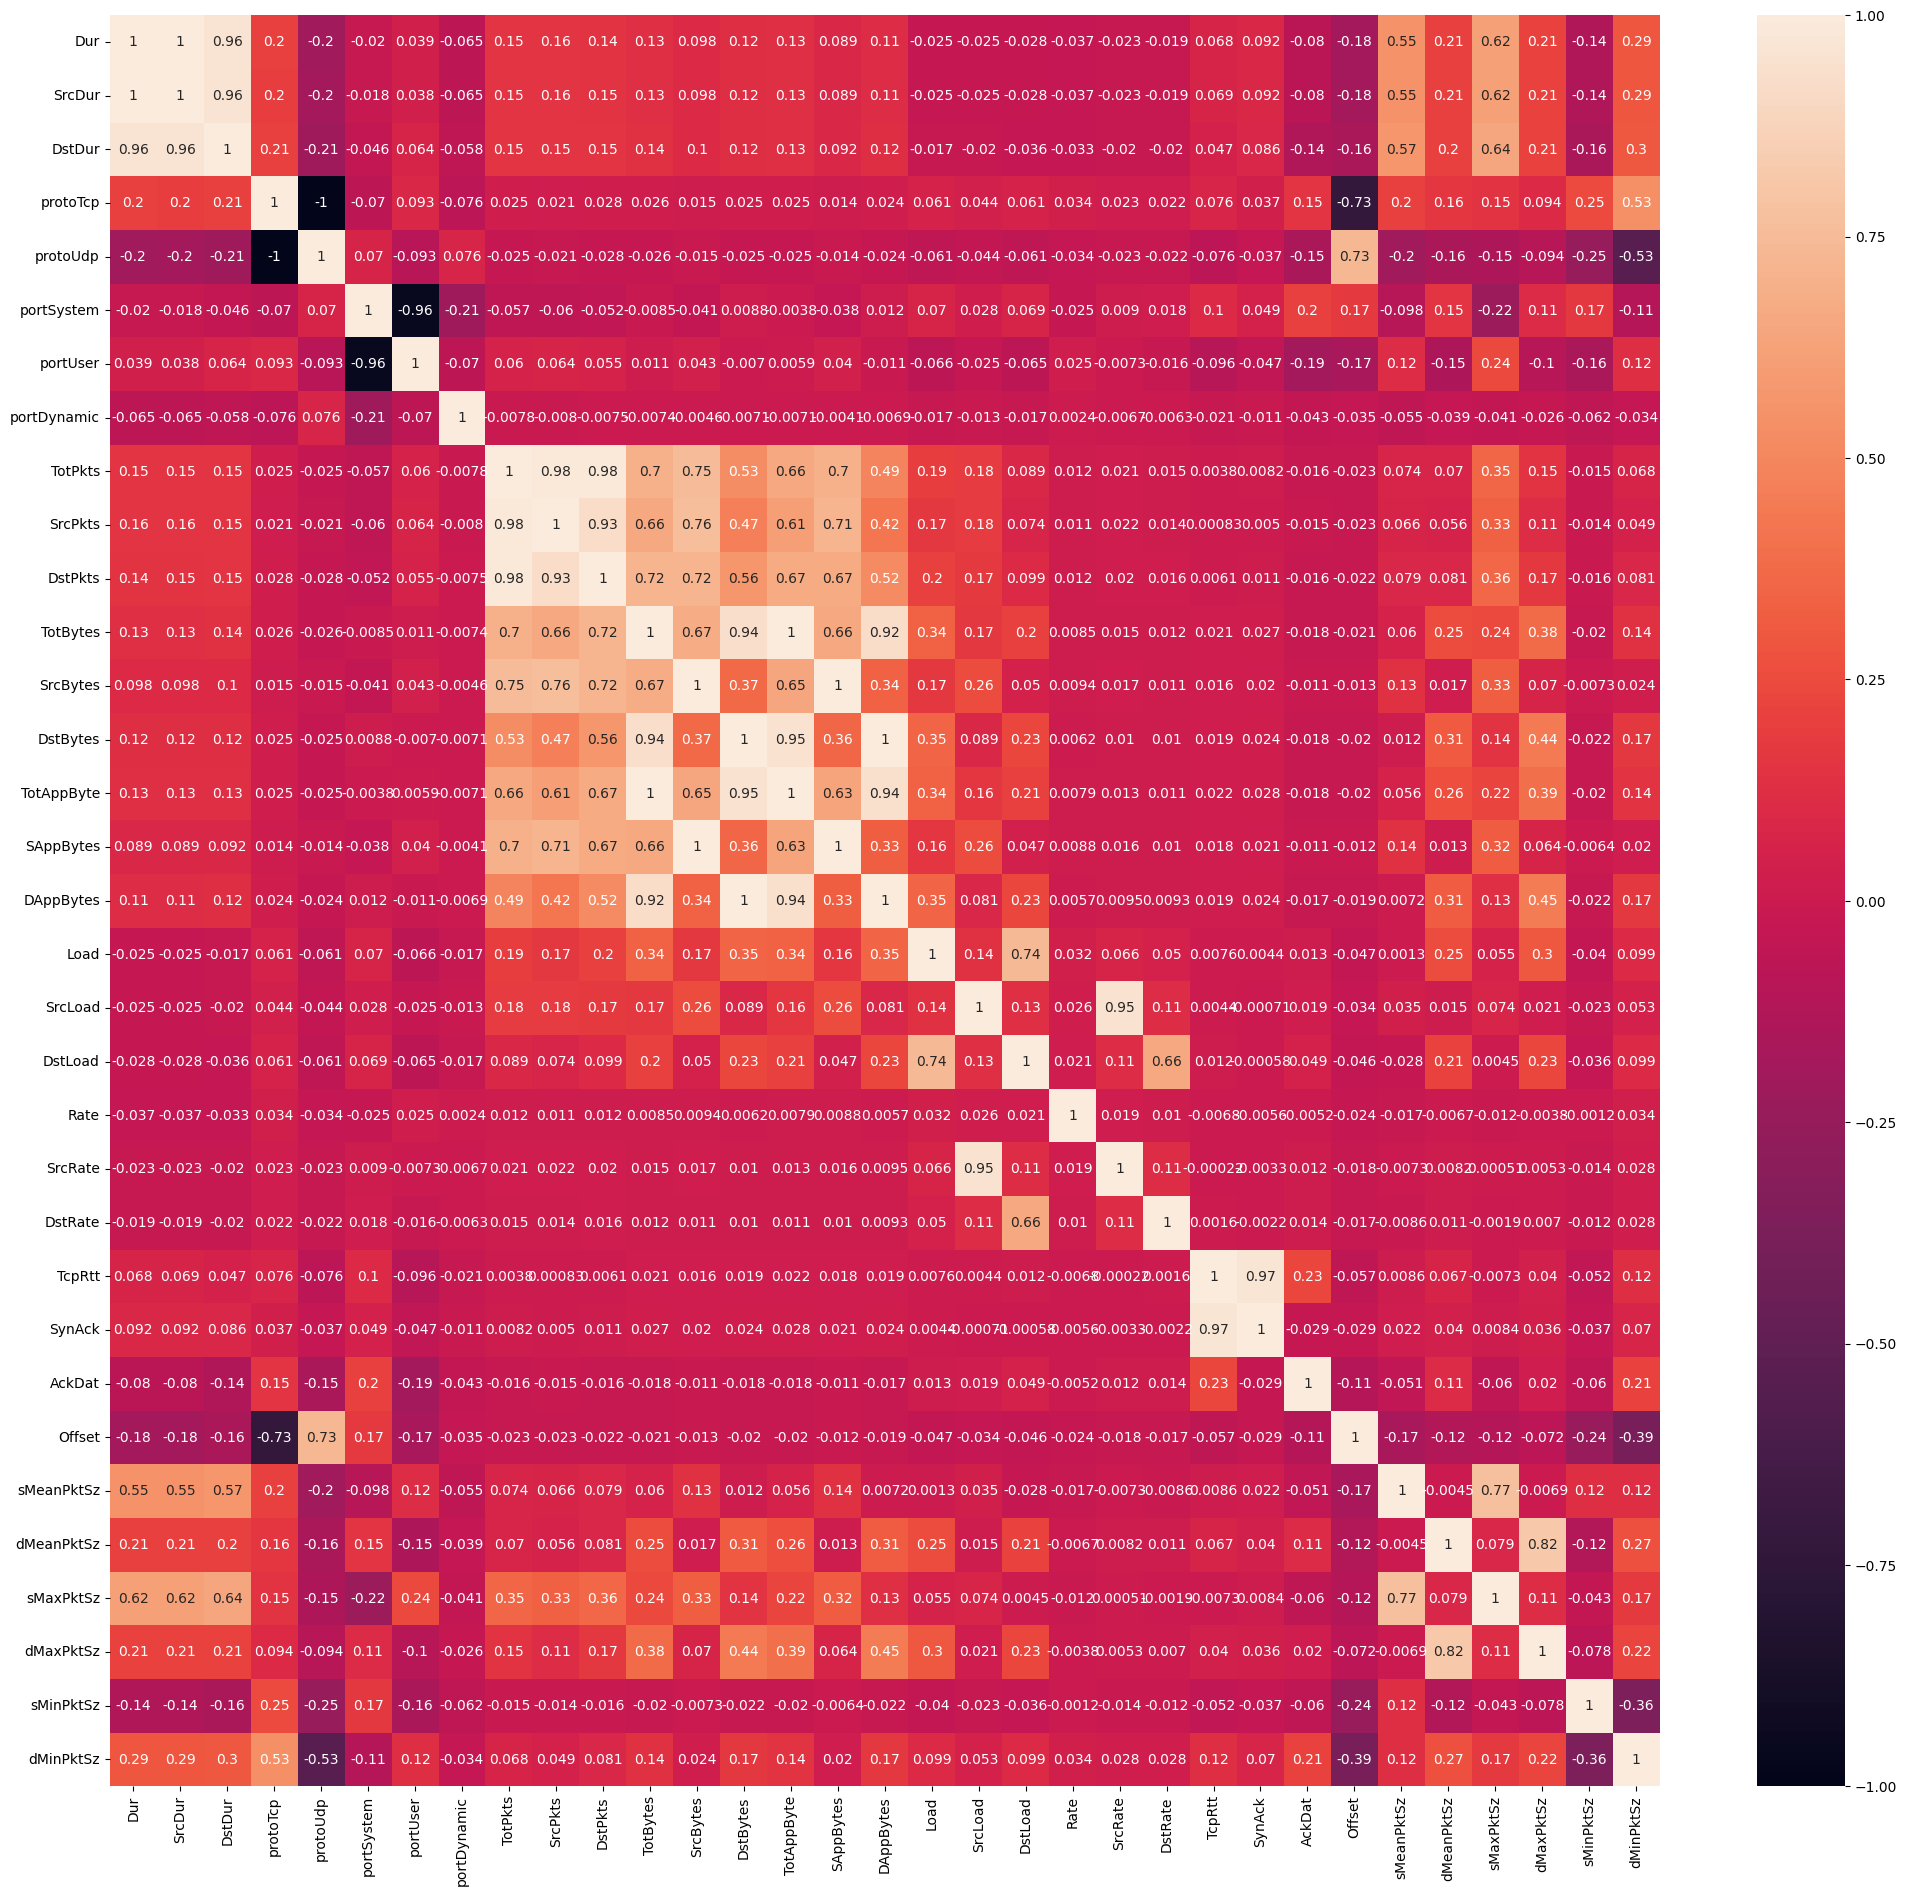

In [15]:
plt.figure(figsize=(25, 23))
sns.heatmap(x_scal_sss.corr(method='pearson'), annot=True)
plt.show()

## Analisis de Componentes Principales

In [16]:
pca = PCA(n_components=30)
componentes_principales = pca.fit(x_scal_sss)

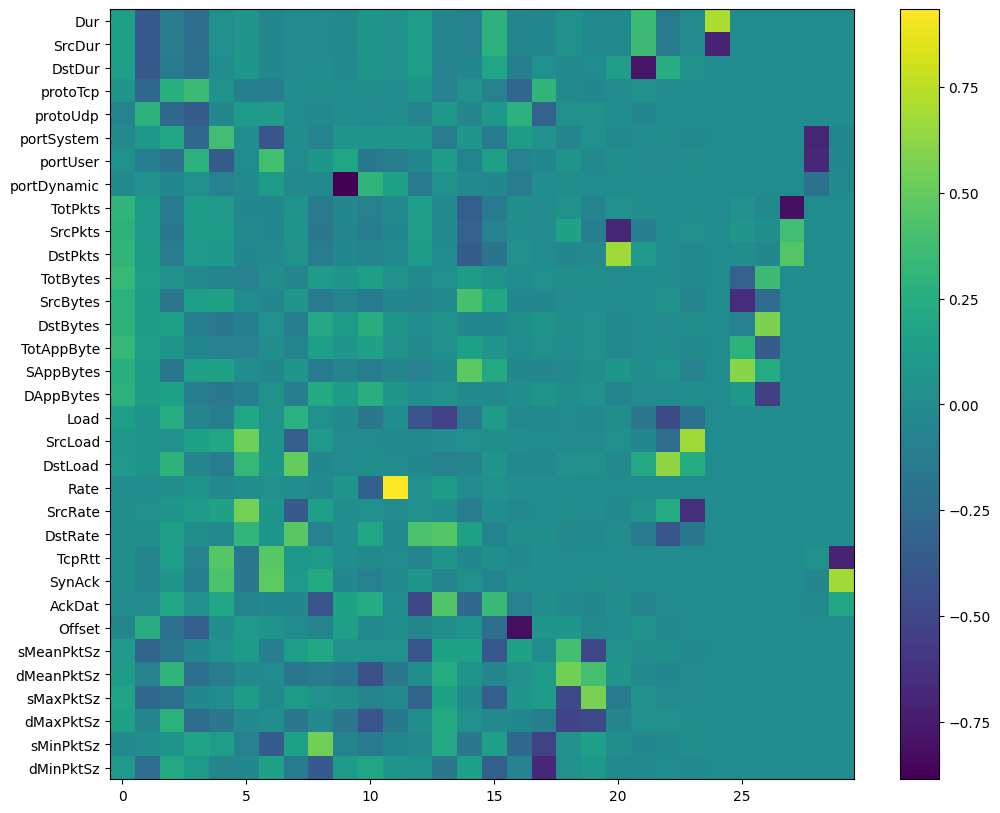

In [17]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(12, 10))
plt.imshow(componentes_principales.components_.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(x_scal_sss.columns)), x_scal_sss.columns)
plt.grid(False)
#plt.savefig('features_pca.png')
plt.colorbar()